# Minimal working example

## MWE LD Clumping

In [88]:
%save MWE_ldclump.sh -f

# Defining bash variables for the different paths,

output=output
bfile=~/MWE0612/genotypes.bed
bgenFile=`echo ~/MWE0612/imputed_genotypes_chr2?.bgen`
sampleFile=~/MWE0612/imputed_genotypes.sample
sumstatsFile=~/MWE0612/output/phenotypes_BMI.fastGWA.snp_stats.gz
unrelated_samples=~/MWE0612/unrelated_samples.txt
ld_sample_size=100
clump_field=P
clump_p1=0.05
clump_p2=1
clump_r2=0.2
clump_kb=1000
clump_annotate=OR
numThreads=20
job_size=1

#Running the workflow for BMI trait

sos dryrun ~/UKBB_GWAS_DEV/workflow/LD_Clumping.ipynb \
    --cwd $output \
    --bfile $bfile \
    --bgenFile $bgenFile \
    --sampleFile $sampleFile \
    --sumstatsFile $sumstatsFile \
    --unrelated_samples $unrelated_samples \
    --ld_sample_size $ld_sample_size \
    --clump_field $clump_field \
    --clump_p1 $clump_p1 \
    --clump_p2 $clump_p2 \
    --clump_r2 $clump_r2 \
    --clump_kb $clump_kb \
    --clump_annotate $clump_annotate \
    --numThreads $numThreads \
    --job_size $job_size
    -q localhost \
    -s build &> 062420-sos-LD-MWE.log

Cell content saved to MWE_ldclump.sh, use option -r to also execute the cell.

## MWE for REGENIE

In [13]:
cd
sos run ~/project/bioworkflows/GWAS/LMM.ipynb regenie \
    --cwd output \
    --bfile /SAY/dbgapstg/scratch/UKBiobank/MWE/genotypes21_22.bed \
    --sampleFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes.sample \
    --bgenFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes_chr*.bgen \
    --phenoFile /SAY/dbgapstg/scratch/UKBiobank/MWE/phenotypes.txt \
    --formatFile /SAY/dbgapstg/scratch/UKBiobank/MWE/regenie_template.yml \
    --phenoCol ASTHMA \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 8 \
    --bsize 1000 \
    --lowmem_prefix output \
    --trait bt \
    --minMAC 4 \
    --bgenMinMAF 0.05 \
    --bgenMinINFO 0.8 \
    --maf_filter  0.5 \
    --geno_filter  0.1 \
    --mind_filter  0.1 \
    --reverse_log_p \
    --p_filter 1\
    --container_lmm /SAY/dbgapstg/scratch/UKBiobank/lmm.sif\
    --container_marp /SAY/dbgapstg/scratch/UKBiobank/marp.sif 

INFO: Running regenie_0: Select the SNPs and samples to be used based on maf, geno, hwe and mind options
INFO: regenie_0 is completed.
INFO: regenie_0 output:   output/cache/genotypes21_22.qc_pass.id output/cache/genotypes21_22.qc_pass.snplist
INFO: Running regenie_1: Run REGENIE step 1: fitting the null
INFO: regenie_1 is completed.
INFO: regenie_1 output:   output/phenotypes_ASTHMA.regenie_pred.list
INFO: Running regenie_2: Run REGENIE step 2: association analysis
INFO: regenie_2 (index=0) is completed.
INFO: regenie_2 (index=1) is completed.
INFO: regenie_2 output:   output/imputed_genotypes_chr21_ASTHMA.regenie.gz output/imputed_genotypes_chr22_ASTHMA.regenie.gz in 2 groups
INFO: Running regenie_3: Merge results and log files
INFO: regenie_3 is completed.
INFO: regenie_3 output:   output/phenotypes_ASTHMA.regenie.snp_stats.gz output/phenotypes_ASTHMA.regenie.snp_counts.txt
INFO: Running regenie_4: Manhattan and QQ plots using `qqman`
INFO: regenie_4 is completed.
INFO: regenie_4 ou

In [10]:
cd
plink2 \
      --bfile /SAY/dbgapstg/scratch/UKBiobank/MWE/genotypes21_22.bed \
      --maf 0.05 \
      --geno 0.1 \
      --mind 0.1 \
      --write-snplist --write-samples --no-id-header \
      --threads ${numThreads} \
      --out output/test 

bash: plink2: command not found...


: 127

In [8]:
cd
sos run ~/project/bioworkflows/GWAS/LMM.ipynb regenie \
    --cwd output \
    --bfile data/genotypes21_22.bed \
    --sampleFile data/imputed_genotypes.sample \
    --bgenFile data/imputed_genotypes_chr*.bgen \
    --phenoFile data/phenotypes.txt \
    --formatFile data/regenie_template.yml \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 8 \
    --bsize 1000 \
    --lowmem_prefix output \
    --trait  \
    --minMAC 4 \
    --bgenMinMAF 0.05 \
    --bgenMinINFO 0.8 \
    --reverse_log_p \
    --p_filter 1\
    --maf_filter  0.5 \
    --geno_filter  0.1 \
    --hwe_filter  1.0 \
    --mind_filter  0.1 \
    --container_lmm /home/dc2325/scratch60/lmm.sif\
    --container_marp /SAY/dbgapstg/scratch/UKBiobank/marp.sif

INFO: Running regenie_1: Run REGENIE step 1: fitting the null
ERROR: regenie_1 (id=b79a7cb41b17acfa) returns an error.
ERROR: [regenie_1]: [0]: Executing script in Singularity returns an error (exitcode=1, stderr=output/phenotypes_BMI.regenie_pred.stderr, stdout=output/phenotypes_BMI.regenie_pred.stdout).
The script has been saved to /gpfs/ysm/home/dc2325/.sos/singularity_run_31768.sh. To reproduce the error please run:
singularity exec  /home/dc2325/scratch60/lmm.sif /bin/bash /gpfs/ysm/home/dc2325/.sos/singularity_run_31768.sh
[regenie]: Exits with 4 pending steps (regenie_2, regenie_3, regenie_4, regenie_5)


: 1

## MWE for BOLT-LMM

In [6]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb boltlmm \
    --cwd output \
    --bfile /SAY/dbgapstg/scratch/UKBiobank/MWE/genotypes.bed \
    --sampleFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes.sample \
    --bgenFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes_chr*.bgen \
    --phenoFile /SAY/dbgapstg/scratch/UKBiobank/MWE/phenotypes.txt \
    --formatFile /SAY/dbgapstg/scratch/UKBiobank/MWE/blotLMM_template.yml \
    --LDscoresFile ~/software/BOLT-LMM_v2.3.4/tables/LDSCORE.1000G_EUR.tab.gz \
    --geneticMapFile ~/software/BOLT-LMM_v2.3.4/tables/genetic_map_hg19_withX.txt.gz \
    --phenoCol BMI \
    --covarCol SEX \
    --covarMaxLevels 10 \
    --qCovarCol AGE \
    --numThreads 5 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --lmm-option \
    --p_filter 1 \
    --container_lmm /SAY/dbgapstg/scratch/UKBiobank/lmm.sif \
    --container_marp /SAY/dbgapstg/scratch/UKBiobank/marp.sif

INFO: Running boltlmm_1: Run BOLT analysis
INFO: boltlmm_1 (index=0) is completed.
INFO: boltlmm_1 (index=1) is completed.
INFO: boltlmm_1 output:   output/cache/imputed_genotypes_chr21.phenotypes_BMI.boltlmm.snp_stats.gz output/cache/imputed_genotypes_chr22.phenotypes_BMI.boltlmm.snp_stats.gz in 2 groups
INFO: Running boltlmm_2: Merge results and log files
INFO: boltlmm_2 is completed.
INFO: boltlmm_2 output:   output/phenotypes_BMI.boltlmm.snp_stats.gz output/phenotypes_BMI.boltlmm.snp_counts.txt
INFO: Running boltlmm_3: Manhattan and QQ plots using `qqman`
INFO: boltlmm_3 is completed.
INFO: boltlmm_3 output:   output/phenotypes_BMI.boltlmm.manhattan.png output/phenotypes_BMI.boltlmm.qq.png... (5 items)
INFO: Running boltlmm_4: Generate analysis report: HTML file, and optionally PPTX file
INFO: boltlmm_4 is completed.
INFO: boltlmm_4 output:   output/phenotypes_BMI.boltlmm.analysis_summary.html
INFO: Workflow boltlmm (ID=ffb9dca48cb662d5) is executed successfully with 4 completed st

## MWE for FastGWA

In [4]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb fastGWA \
    --cwd ~/output \
    --bfile /SAY/dbgapstg/scratch/UKBiobank/MWE/genotypes.bed \
    --sampleFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes.sample \
    --bgenFile /SAY/dbgapstg/scratch/UKBiobank/MWE/imputed_genotypes_chr*.bgen \
    --phenoFile /SAY/dbgapstg/scratch/UKBiobank/MWE/phenotypes.txt \
    --formatFile /SAY/dbgapstg/scratch/UKBiobank/MWE/fastGWA_template.yml \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 1 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --parts 2 \
    --p_filter 1 \
    --container_lmm /SAY/dbgapstg/scratch/UKBiobank/lmm.sif \
    --container_marp /SAY/dbgapstg/scratch/UKBiobank/marp.sif 

INFO: Running fastGWA_1: fastGWA mixed model (based on the sparse GRM generated above)
INFO: fastGWA_1 (index=0) is completed.
INFO: fastGWA_1 (index=1) is completed.
INFO: fastGWA_1 output:   /home/dc2325/output/cache/imputed_genotypes_chr21.phenotypes.fastGWA.gz /home/dc2325/output/cache/imputed_genotypes_chr22.phenotypes.fastGWA.gz in 2 groups
INFO: Running fastGWA_2: Merge results and log files
INFO: fastGWA_2 is completed.
INFO: fastGWA_2 output:   /home/dc2325/output/phenotypes_BMI.fastGWA.snp_stats.gz /home/dc2325/output/phenotypes_BMI.fastGWA.snp_counts.txt
INFO: Running fastGWA_3: Manhattan and QQ plots using `qqman`
INFO: fastGWA_3 is completed.
INFO: fastGWA_3 output:   /home/dc2325/output/phenotypes_BMI.fastGWA.manhattan.png /home/dc2325/output/phenotypes_BMI.fastGWA.qq.png... (5 items)
INFO: Running fastGWA_4: Generate analysis report: HTML file, and optionally PPTX file
INFO: fastGWA_4 is completed.
INFO: fastGWA_4 output:   /home/dc2325/output/phenotypes_BMI.fastGWA.anal

In [ ]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb fastGWA \
    --cwd output \
    --bfile data/genotypes.bed \
    --sampleFile data/imputed_genotypes.sample \
    --bgenFile data/imputed_genotypes_chr*.bgen \
    --phenoFile data/phenotypes.txt \
    --formatFile data/fastGWA_template.yml \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 1 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --parts 2 \
    --p_filter 1 \
    --container_lmm container_lmm \
    --container_marp container_marp

## MWE for hudson

In [1]:
sos run ~/project/UKBB_GWAS_DEV/workflow/Hudson_plot.ipynb hudson  \
    --cwd ~/output \
    --sumstats_1 ~/output/phenotypes_WAIST.fastGWA.snp_stats.gz \
    --sumstats_2 ~/output/phenotypes_BMI.fastGWA.snp_stats.gz \
    --toptitle Waist \
    --bottomtitle BMI \
    --highlight_p_top 0.1 \
    --highlight_p_bottom 0.1 \
    --pval_filter 1 \
    --container_lmm /home/dc2325/lmm_v1_2.sif

INFO: Running hudson_1: 
INFO: hudson_1 (index=0) is ignored due to saved signature
INFO: hudson_1 output:   /home/dc2325/output/phenotypes_WAIST.fastGWA_phenotypes_BMI.fastGWA.snplist
INFO: Running hudson_2: Hudson plots for two traits
INFO: hudson_2 is completed.
INFO: hudson_2 output:   /home/dc2325/output/phenotypes_WAIST.fastGWA_phenotypes_BMI.fastGWA.hudson.png
INFO: Workflow hudson (ID=3890c8108800bcf8) is executed successfully with 1 completed step and 1 ignored step.


> /home/dc2325/output/phenotypes_WAIST.fastGWA_phenotypes_BMI.fastGWA.hudson.png (375.8 KiB):

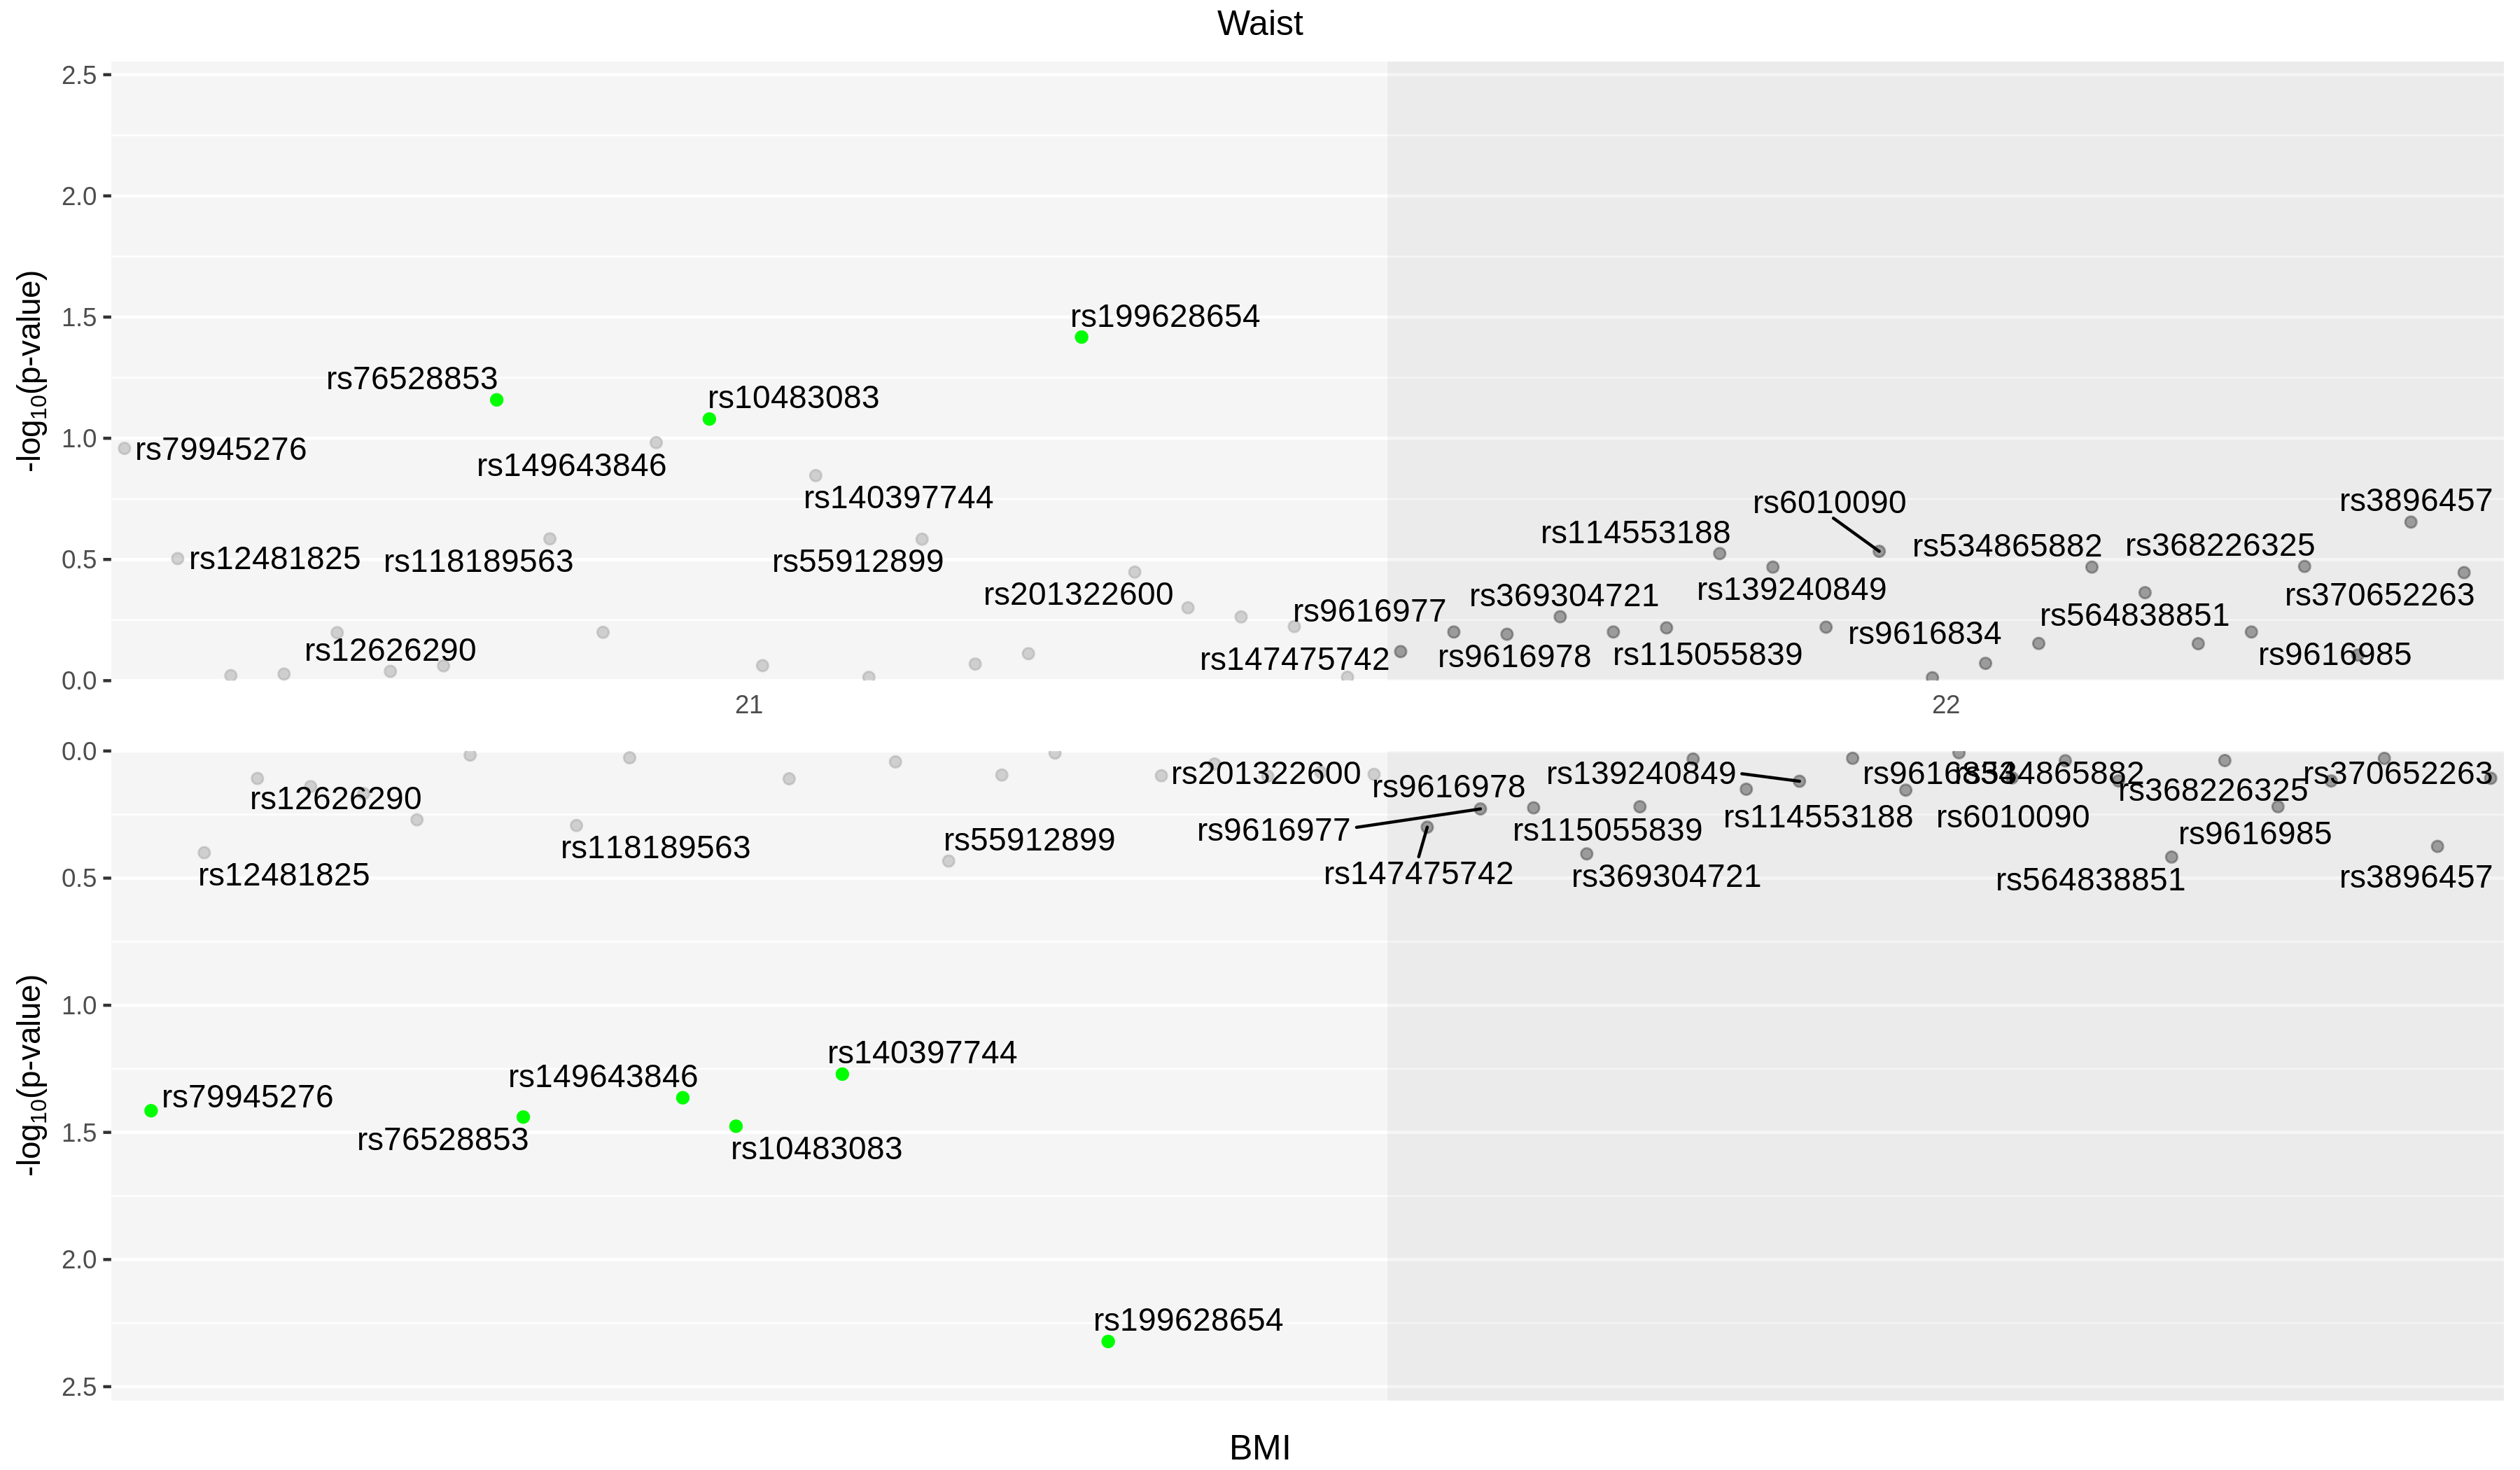

In [1]:
%preview -s png ~/output/phenotypes_WAIST.fastGWA_phenotypes_BMI.fastGWA.hudson.png